In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os

def pre_procces(data_file, cv_file, label_file):
    my_data = pd.read_csv(data_file, delimiter='*', header=None)
    train_data = pd.read_csv(cv_file, delimiter='*', header=None)
    my_label = pd.read_csv(label_file, header=None)
    
    train_data.columns = ['cv1', 'cv2']
    my_data['label'] = my_label
    my_data.columns = ['m1', 'm2', 'label']
    
    train_data['m1'], train_data['m2'], train_data['label'] = my_data['m1'], my_data['m1'], my_data['label']
    print(train_data.isnull().values.any())
    train_data.drop(train_data.index[train_data['label'] == '@#$%'], inplace = True)
    train_data.drop(train_data.index[train_data['label'] == '*'], inplace = True)
    print(train_data.isnull().values.any())
    return train_data

In [3]:
data = '/content/drive/MyDrive/Dataset/NLP/HW6 - Arooz/Arooz-v2.00/Data/DSUSTrn-v2.00.txt'
label = '/content/drive/MyDrive/Dataset/NLP/HW6 - Arooz/Arooz-v2.00/Data/DSATrn-v2.00.txt'
cv = '/content/drive/MyDrive/Dataset/NLP/HW6 - Arooz/Arooz-v2.00/Data/DSCVTrn-v2.00.txt'

clean_data = pre_procces(data, cv, label)
clean_data

True
False


,cv1,cv2,m1,m2,label
0,cvccvvccvcvccvcccvcvvcvvccvcvvcvcvc,cvvcvcccvcvccvvcvccvvcvccvcvvccvvc,--UU--UU--UU--,--UU--UU--UU--,1003
1,cvvccvvcvccvcvcvvcvcccvcvccvvccvcvc,cvvvcvvcvvcvccvccvvcvcvvcvvccvcvc,UU--UU--UU--UU-,UU--UU--UU--UU-,1001
2,cvccvcvccvcccvcvccvccvcvccvccvcvcvcvvc,cvccvcvvccvcvvcvccvcvcvvcvvccvcvc,UU--UU--UU--UU-,UU--UU--UU--UU-,1001
3,cvcvcccvccvccvccvcccvccvcvccvccvccvvc,cvvcvvccvvcvccvvcvccvvccvvcvcvvcvcvcvvcvc,-U---U---U---U-,-U---U---U---U-,1014
4,cvcvcvvcvcvccvcvccvccvcvcvvcvvccvcvccvc,cvcvcvccvccvccvcvccvvvcvcvvcvvcvcvcvvc,UU--UU--UU--UU-,UU--UU--UU--UU-,1025
...,...,...,...,...,...
919,cvccvcvvcvccvcvcvvcvvccvcvcvcvvccvcvv,cvvcvcvccvcvccvcvcvccvcvccvcvcvcvcvvc,UU--UU--UU--UU-,UU--UU--UU--UU-,1001
920,cvccvcvcvcvvccvcvccvcccvccvccvvccvcvc,cvvcvccvvcvccvcvcvccvvcvccvvcvccvcvcvc,-UU--UU--UU--UU-,-UU--UU--UU--UU-,1024
921,cvccvcvcvcccvcvccvvcvcvcvccvccvcvc,cvcvcvccvcvcvcvcvvcvvccvcvcvccvccvvcvc,-UU--U--UU--U-,-UU--U--UU--U-,1001
922,cvvcvvcvcvccvcvvvcvvcvccvvcvccvcvccvc,cvccvvcvcvccvcvvcvcvcccvcvccvcvccvc,--U-U----U-U--,--U-U----U-U--,1007


In [4]:
data_tst = '/content/drive/MyDrive/Dataset/NLP/HW6 - Arooz/Arooz-v2.00/Data/DSUSTst-v2.00.txt'
label_tst = '/content/drive/MyDrive/Dataset/NLP/HW6 - Arooz/Arooz-v2.00/Data/DSATst-v2.00.txt'
cv_tst = '/content/drive/MyDrive/Dataset/NLP/HW6 - Arooz/Arooz-v2.00/Data/DSCVTst-v2.00.txt'

clean_data_tst = pre_procces(data_tst, cv_tst, label_tst)
clean_data_tst

True
False


,cv1,cv2,m1,m2,label
0,cvccvvcvcvcvvccvvcvcvccvvcvc,cvccvccvcvvcvcvvccvcvccvvcvc,--UU-U-U---,--UU-U-U---,1029
1,cvcvvcvcvcvccvcvvcvcvcvccvcvcvcvcvvc,cvcvvcvcvvcvccvccvvcvcvccvcvvcvcvcvvc,U--UU--UU--UU--,U--UU--UU--UU--,1002
2,cvccvvccvcvcvcvvcvcvcvcvcvvcvcvcccvv,cvccvcccvcvcvcvvcvcvcvcvcvvcvcvcvvcvvc,--U-U-UU--U-U-,--U-U-UU--U-U-,1003
3,cvcvvcvvcvcvcvvccvcvccvcccvcvvcvvc,cvcvvcvvccvvcvvccvcvccvvcvcvcvvcvvc,U--UU--UU--UU--,U--UU--UU--UU--,1027
4,cvccvccvvcvccvcccvcvccvcccvcvvccvcvcvc,cvvccvcvvcvvcvcvcvccvvcvcvcvvcvvcvccvc,-UU--UU--UU--UU-,-UU--UU--UU--UU-,1024
...,...,...,...,...,...
391,cvccvccvccvcvcvcvcvvcvccvccvcvc,cvccvccvcvccvcvvcvccvcvcvcvcvccvcvv,--U-U-UU--U-U-,--U-U-UU--U-U-,1003
392,cvcvvcvvcvcccvccvcvvcvvcvvcvv,cvcvcvcvcvcvcvcvccvvcvvcvv,U---U---U--,U---U---U--,1023
393,cvcvcvcvvcvcvvcvccvccvvcvcvc,cvcvvcvvccvvcvvcvcvvcvvcvvcvv,UU--U-U-UU-,UU--U-U-UU-,1023
394,cvcccvvcvcvvcvvcvcvvcvvcvcvvc,cvcvccvvcvccvccvcvvcvvcvvcvv,U--U--U--U--,U--U--U--U--,1023


In [5]:
from sklearn.preprocessing import LabelBinarizer
def mapping(clean_data):
    
    ln2 = int(clean_data['cv1'].str.encode(encoding='utf-8').str.len().max())
    ln3 = int(clean_data['cv2'].str.encode(encoding='utf-8').str.len().max()) 
    ln4 = int(clean_data['m1'].str.encode(encoding='utf-8').str.len().max()) 
    ln5 = int(clean_data['m2'].str.encode(encoding='utf-8').str.len().max()) 
    print(max(ln2, ln3, ln4, ln5))
    #ln = int(clean_data['cv1'].str.encode(encoding='utf-8').str.len().max()) + int(clean_data['cv2'].str.encode(encoding='utf-8').str.len().max()) + int(clean_data['m1'].str.encode(encoding='utf-8').str.len().max()) + int(clean_data['m2'].str.encode(encoding='utf-8').str.len().max())
    b2 = np.zeros((len(clean_data['cv2'])*2, 65))
    X_data = clean_data.drop('label', axis=1)

    this_str = ''
    m_list = []
    f_list = []
    for i in range(X_data.shape[0]):
        #print(X_data.iloc[i])
        this_str += X_data.iloc[i][0]
        #print(this_str)
        this_str += X_data.iloc[i][2]
        #print(this_str)
        m_list.append(this_str)
        this_str = ''
        #break
    
    for i in range(X_data.shape[0]):
        #print(X_data.iloc[i])
        this_str += X_data.iloc[i][1]
        #print(this_str)
        this_str += X_data.iloc[i][3]
        #print(this_str)
        m_list.append(this_str)
        this_str = ''
        #break    
        #print(len(m_list), len(m_list[116]))    
    
    for i in range(b2.shape[0]):
        for j in range(len(m_list[i])):
            if m_list[i][j] == '-':
                b2[i][j] += 4.0
            #m_list.append(1.0)
            elif m_list[i][j] == 'U':
                b2[i][j] += 3.0
            elif m_list[i][j] == 'c':
                b2[i][j] += 2.0
            elif m_list[i][j] == 'v':
                b2[i][j] += 1.0
                
    y = LabelBinarizer().fit_transform(clean_data.label)
    y1 = np.concatenate((y, y), axis=0)
    
    X, y = b2, y1
    
    return X, y

In [6]:
X, y = mapping(clean_data)
X[0] , y[0]

47


(array([2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2.,
        1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1.,
        2., 4., 4., 3., 3., 4., 4., 3., 3., 4., 4., 3., 3., 4., 4., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [7]:
ln = int(clean_data_tst['cv1'].str.encode(encoding='utf-8').str.len().max()) + int(clean_data_tst['cv2'].str.encode(encoding='utf-8').str.len().max()) + int(clean_data_tst['m1'].str.encode(encoding='utf-8').str.len().max()) + int(clean_data_tst['m2'].str.encode(encoding='utf-8').str.len().max())
ln

129

In [8]:
X_test, y_test = mapping(clean_data_tst)
X_test.shape, y_test.shape

49


((774, 65), (774, 31))

In [9]:
X.shape, y.shape

((1820, 65), (1820, 31))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)

In [11]:
X_train.shape, y_train.shape, type(X_train), type(y_train)

((1456, 65), (1456, 31), numpy.ndarray, numpy.ndarray)

In [12]:
X_val.shape, y_val.shape, type(X_val), type(y_val)

((364, 65), (364, 31), numpy.ndarray, numpy.ndarray)

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

In [208]:
input_layer = Input(shape=(65,))

x = Dense(units=1024, activation='relu')(input_layer)
x = Dense(units=1024, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dense(units=256, activation='relu')(x)
x = Dense(units=256, activation='relu')(x)
x = Dense(units=128, activation='relu')(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(0.85)(x)
predictions = Dense(units=31, activation='softmax')(x)

my_classifier_model = Model(inputs=input_layer, outputs=predictions)

In [209]:
my_classifier_model.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 65)]              0         
_________________________________________________________________
dense_210 (Dense)            (None, 1024)              67584     
_________________________________________________________________
dense_211 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_212 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_213 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_214 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_215 (Dense)            (None, 256)               131

In [210]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
opt = SGD(learning_rate=0.001, momentum=0.98, decay=0.0001)
#opt = RMSprop(learning_rate=0.01)

my_classifier_model.compile(optimizer=opt,
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

In [211]:
my_classifier_model.fit(x=X_train,
                              y=y_train,
                              batch_size=32,
                              epochs=200,
                              shuffle=True,
                              verbose=0,
                              validation_data=(X_val, y_val))

In [213]:
model_loss_history['val_loss'].min()

1.913007140159607

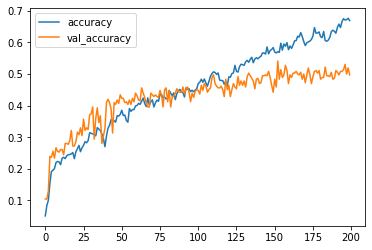

In [214]:
model_accuracy_history = pd.DataFrame({'accuracy': my_classifier_model.history.history['accuracy'],
                                       'val_accuracy': my_classifier_model.history.history['val_accuracy']})
model_accuracy_history.plot()

In [215]:
model_accuracy_history['val_accuracy'].max()

0.541208803653717

In [216]:
my_classifier_model.evaluate(x=X_test, y=y_test)

25/25 [==============================] - 0s 4ms/step - loss: 4.0429 - accuracy: 0.4703


[4.042856693267822, 0.47028422355651855]